Importar librerías

In [49]:
import cv2
import numpy as np
import sys
import tifffile as tf
import glob
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from scipy.ndimage import gaussian_filter
import statistics
import matplotlib.pyplot as plt
import math

Función para leer imágenes

In [50]:
# Reads all the files and returns a list of images with 3 channels
# (brightfield, GFP, mCheery)
def read_files(path):
    files = glob.glob(f"{path}/*.jpeg")
    files = sorted(files)
    images = []

    for file in files:
        im = cv2.imread(file)
        images.append(im)

    return images

Leer imágenes del conjunto de datos

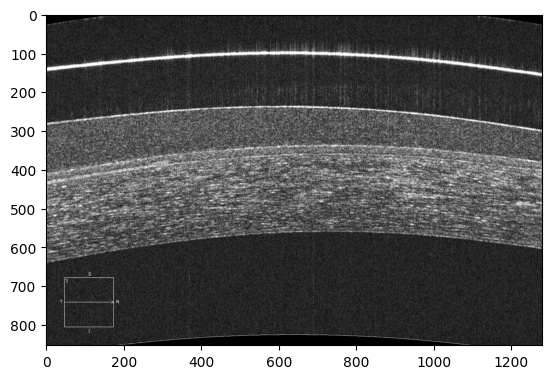

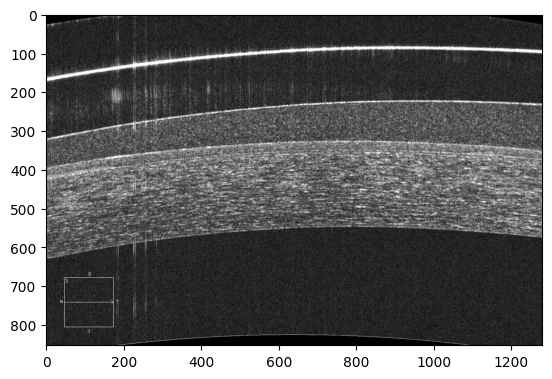

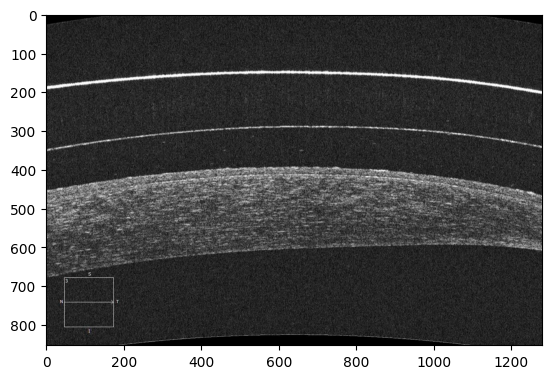

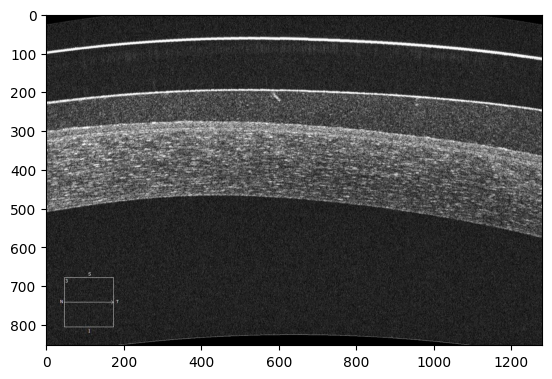

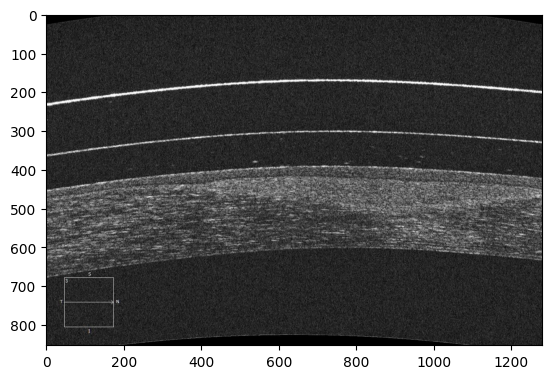

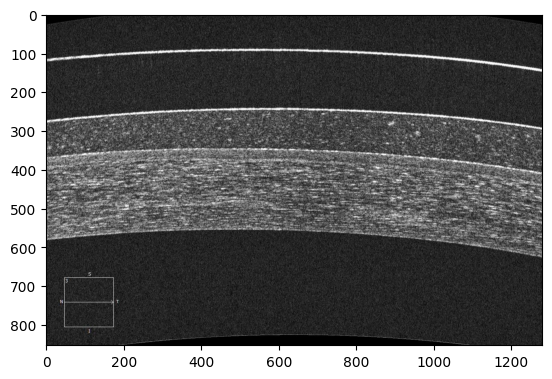

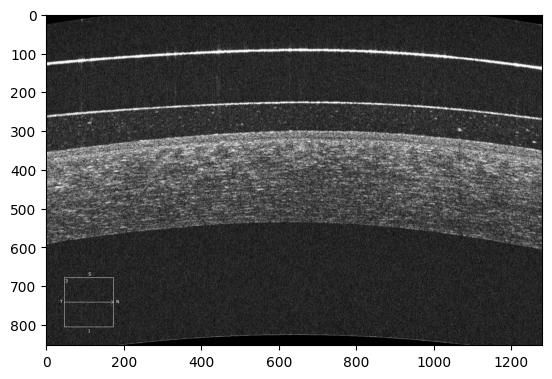

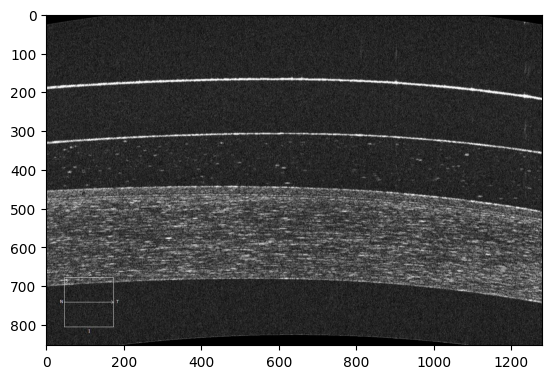

In [51]:
path = "./6_AS-OCT/" # Set this variable to the appropriate path
images = read_files(path)

# Representamos las imágenes
for im in images:
    plt.imshow(im, cmap = "gray")
    plt.show()



Tarea 1: Identificación de las estructuras de interés

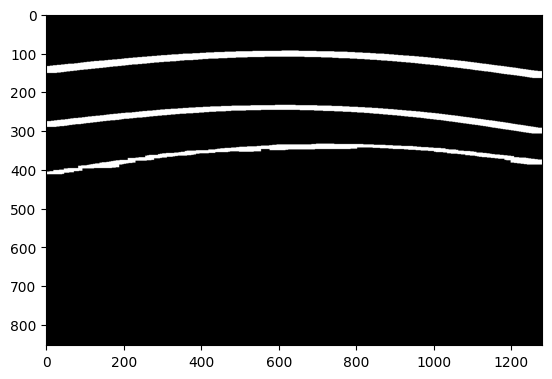

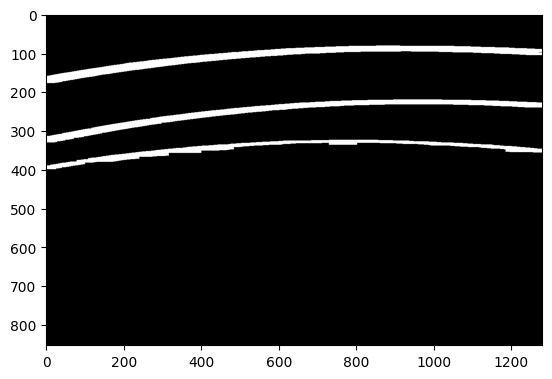

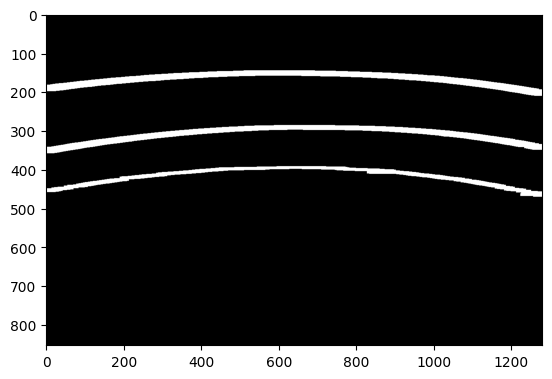

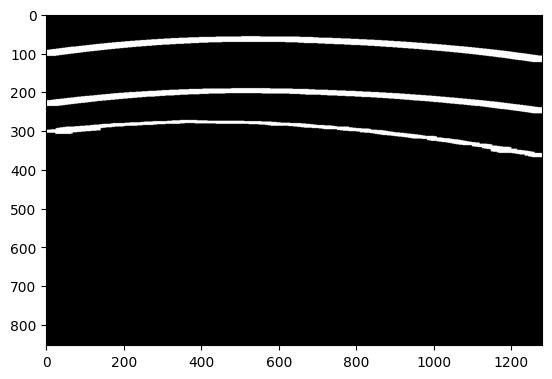

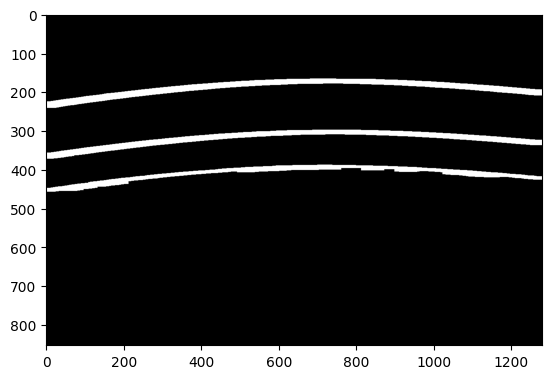

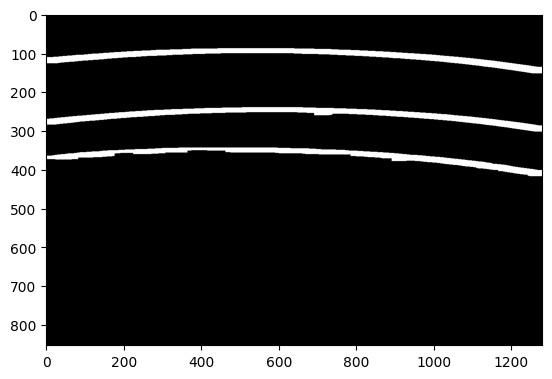

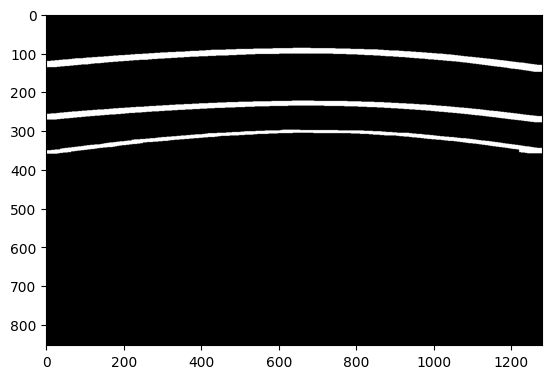

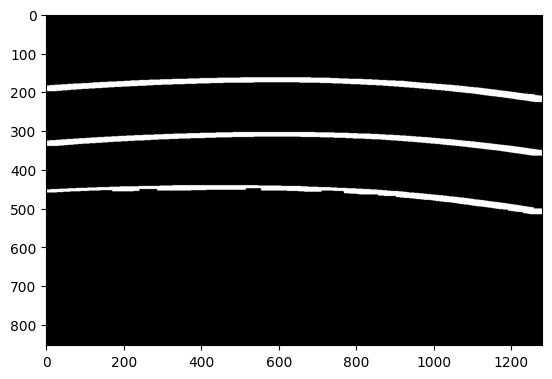

In [52]:

estruc = []
contours_filter = []

kernel_horizontal_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 4))
kernel_horizontal_rect2 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,4))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))

for im in images:
    imag = rescale_intensity(im, in_range='image', out_range=(0,255)).astype(np.uint8)
    imag_ = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = gaussian_filter(imag_, sigma=(2,6)) # Eliminamos ruido
    edges = cv2.Canny(blur, 65, 100)
    _, otsu_thresh =cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    opening = cv2.morphologyEx(otsu_thresh, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel_horizontal_rect, iterations=2)
    erosion1 = cv2.erode(dilation, kernel_horizontal_rect, iterations=1)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(erosion1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # # Filtrar contornos por tamaño
    filtered_contours = [] 
    for contour in contours:
        if cv2.contourArea(contour) > 6500:
            x, y, w, h = cv2.boundingRect(contour)
            # Verificar si el contorno está por debajo del umbral inferior
            if y + h <=  550:
                # Si está por encima del umbral, agregarlo a la lista de contornos filtrados
                filtered_contours.append(contour)

    # # Crear una copia de la imagen redimensionada para dibujar los contornos
    mask = np.zeros_like(imag_)
    # # Dibujar los contornos en la copia de la imagen redimensionada
    cv2.drawContours(mask, filtered_contours, -1, 255, thickness = cv2.FILLED )  # Dibujar los contornos filtrados
    mask = cv2.dilate(mask, kernel_horizontal_rect2, iterations=1)

    estruc.append(mask)
    contours_filter.append(filtered_contours)

for im in estruc:
    plt.imshow(im, cmap = "gray")
    plt.show()


Tarea 2: Medición por columnas de las distancias entre las estructuras identificadas.

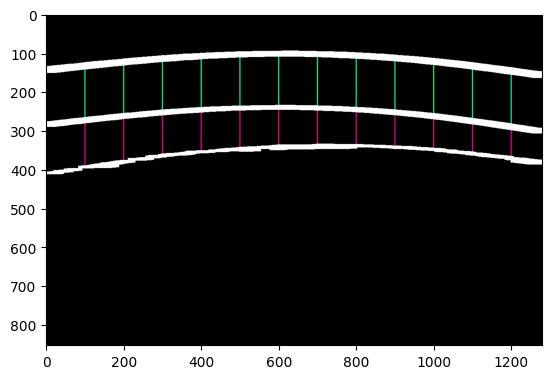

Distancias Imagen 0:
	 - Distancias Lente Externa - Cornea en micrómetros: [291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 291.25, 288.92, 288.92, 288.92, 288.92, 288.92, 288.92, 288.92, 288.92, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 288.92, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 288.92, 288.92, 288.92, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 288.92, 288.92, 288.92, 288.92, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 286.59000000000003, 288.92, 286.59000000000003, 286.

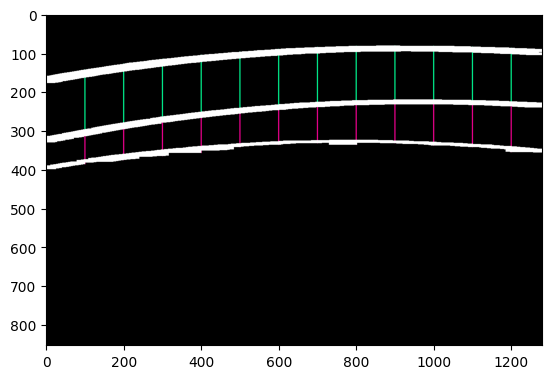

Distancias Imagen 1:
	 - Distancias Lente Externa - Cornea en micrómetros: [319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 319.21000000000004, 316.88, 316.88, 316.88, 316.88, 316.88, 314.55, 314.55, 314.55, 314.55, 314.55, 312.22, 312.22, 312.22, 314.55, 314.55, 314.55, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 314.55, 314.55, 314.55, 309.89, 309.89, 314.55, 314.55, 314.55, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 312.22, 314.55, 312.22, 312.22, 312.22, 312.22, 312.22, 314.55, 312.22, 312.22, 312.22, 312.22, 312.22, 309.89, 312.22, 312.22, 312.22, 312.22, 309.89, 312.22, 312.22, 312.22, 312.22, 309.89, 309.89, 312.22, 312.22, 312.22, 309.89, 309.89, 312.22, 312.22, 312.22, 312.22, 309.89, 312.22, 312.22, 312.22, 312.22, 309.89, 309.89, 309.89, 312.22, 

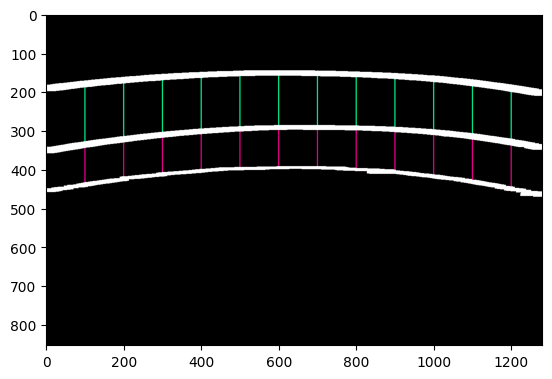

Distancias Imagen 2:
	 - Distancias Lente Externa - Cornea en micrómetros: [335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 328.53000000000003, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 326.2, 326.2, 328.53000000000003, 328.53000000000003, 328.53000000000003, 326.2, 326.2, 326.2, 326.2, 328.53000000000003, 328.53000000000003, 326.2, 326.2, 326.2, 326.2, 328.53000000000003, 328.53000000000003, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 326.2, 328.53000000000003, 328.530000000000

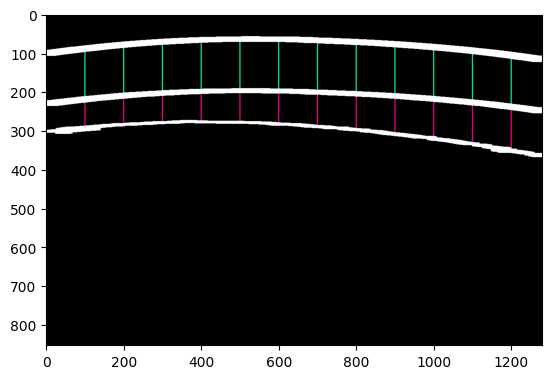

Distancias Imagen 3:
	 - Distancias Lente Externa - Cornea en micrómetros: [267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 263.29, 265.62, 265.62, 265.62, 265.62, 263.29, 263.29, 263.29, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 263.29, 263.29, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 263.29, 263.29, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 263.29, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 267.95, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 263.29, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 267.95, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 267.95, 267.95, 267.95, 267.95, 265.62, 265.62, 265.62, 265.62, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 267.95, 267.95, 267.

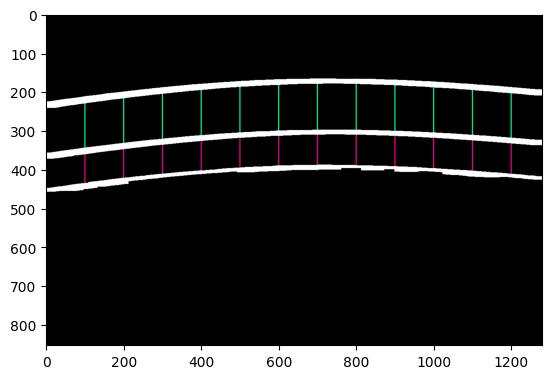

Distancias Imagen 4:
	 - Distancias Lente Externa - Cornea en micrómetros: [270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 270.28000000000003, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 265.62, 267.95, 265.62, 265.62, 265.62, 265.62, 267.95, 265.62, 265.62, 265.62, 265.62, 265.62, 267.95, 267.95, 267.95, 265.62, 265.62, 265.62, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 265.62, 265.62, 267.95, 267.95, 267.95, 267.95, 265.62, 265.62, 267.95, 267.95, 267.95, 267.95, 267.95, 270.28000000000003, 267.95, 267.95, 267.95, 267.95, 267.95, 267.95, 265.62, 267.95, 267.95, 267.

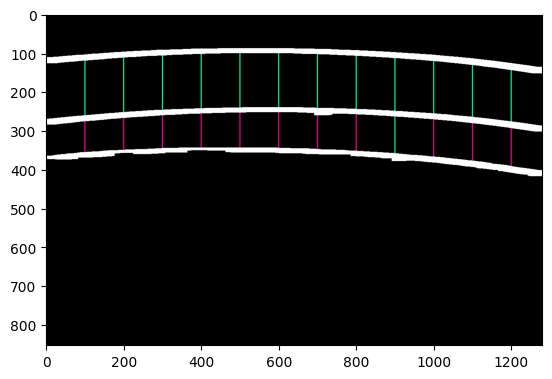

Distancias Imagen 5:
	 - Distancias Lente Externa - Cornea en micrómetros: [335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 335.52, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 333.19, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 333.19, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 328.53000000000003, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 328.53000000000003, 328.53000000000003, 328.53000000000003, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.86, 330.

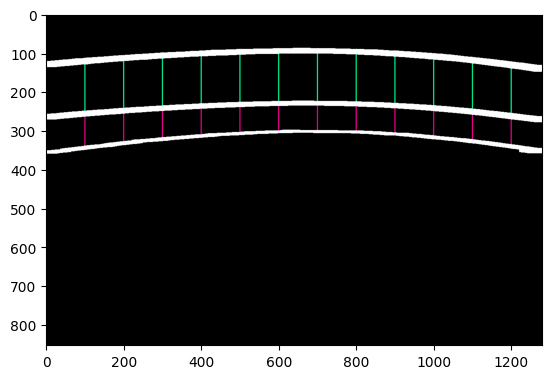

Distancias Imagen 6:
	 - Distancias Lente Externa - Cornea en micrómetros: [281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 281.93, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 277.27, 277.27, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 277.27, 277.27, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 281.93, 281.93, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 277.27, 277.27, 277.27, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 279.6, 281.93, 281.93, 281.93, 281.93, 279.6, 279.6, 279.6, 279.6, 279.6, 281.93, 281.93,

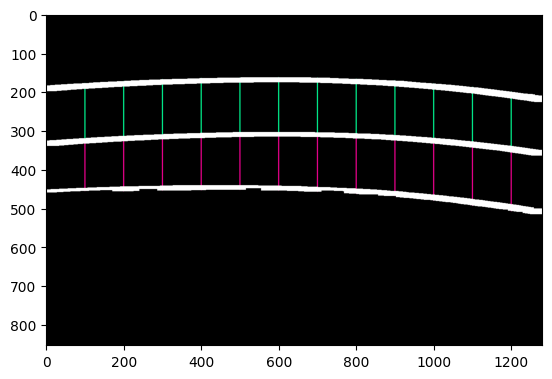

Distancias Imagen 7:
	 - Distancias Lente Externa - Cornea en micrómetros: [298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 293.58, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 293.58, 293.58, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 298.24, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 295.91, 298.24, 298.24, 298.24, 298.24, 298.24, 298.

In [53]:
def distancia_Euclidiana(p1, p2):
    if len(p1) != len(p2):
        raise ValueError("Points must have the same number of dimensions")

    squared_distance = 0
    for i in range(len(p1)):
        squared_distance += (p2[i] - p1[i]) ** 2

    distance = squared_distance ** 0.5
    return distance

posiciones_blacasxim = []

def guardar_distancias_entre_columnas(imagen):
    # Lee la imagen en escala de grises
    
    # Obtiene las dimensiones de la imagen
    _, ancho = imagen.shape
    
    # Lista para almacenar las posiciones de los primeros píxeles blancos y las distancias entre ellos
    Dist_Ext_Media = []
    Dist_Int_Cornea = []
    mask = np.zeros_like(cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR))
    contours, _ = cv2.findContours(imagen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   
    # Itera sobre todas las columnas de la imagen
    for columna in range(ancho):
            columna_img = imagen[:, columna]
            primer_pixel_blanco = next((i for i, pixel in enumerate(columna_img) if pixel == 255), None)

            if primer_pixel_blanco is not None:
                posiciones_blancas = [i for i, pixel in enumerate(columna_img[primer_pixel_blanco:], start=primer_pixel_blanco) if pixel == 255]
                
                if len(posiciones_blancas) > 1:
                    # Si hay al menos dos píxeles blancos en la columna
                    distancias = [math.sqrt((posiciones_blancas[i+1] - posiciones_blancas[i])**2) for i in range(len(posiciones_blancas) - 1)]
                    distancias_mayores_que_uno = [distancia for distancia in distancias if distancia > 2]
                    # Dibujar una única línea entre los píxeles medidos
                    if columna % 100 == 0:
                        pt1 = (columna, primer_pixel_blanco)
                        pt2 = (columna, posiciones_blancas[-20])
                        pt3 = (columna, posiciones_blancas[-1])
                        cv2.line(mask, pt1, pt2, (0, 255, 150), 2)
                        cv2.line(mask, pt2, pt3, (250, 0, 150), 2)
                    Dist_Ext_Media.append((distancias_mayores_que_uno[0]*2.33))  
                    Dist_Int_Cornea.append((distancias_mayores_que_uno[1]*2.33))
    posiciones_blacasxim.append(posiciones_blancas)
    cv2.drawContours(mask, contours, -1,(255, 255, 255), thickness=cv2.FILLED)
    plt.imshow(mask, cmap = "gray")
    plt.show()            
    return Dist_Ext_Media, Dist_Int_Cornea, posiciones_blacasxim

# Obtiene las distancias entre columnas


Distancias_lentesxIm = []

for i, im in enumerate(estruc):
    Dist_Ext_Media, Dist_Int_Cornea, posiciones_blacasxim = guardar_distancias_entre_columnas(im)
    Dist_Ext_Cornea = [x + y for x, y in zip(Dist_Ext_Media, Dist_Int_Cornea)]
    Distancias_lentesxIm.append([Dist_Ext_Media, Dist_Int_Cornea, Dist_Ext_Cornea])
    print(f"Distancias Imagen {i}:")
    print("\t - Distancias Lente Externa - Cornea en micrómetros:", Dist_Ext_Media)
    print("\t - Distancias Lente Interna - Cornea en micrómetros:", Dist_Int_Cornea)
    print("\t - Distancias Lente Externa - Lente Media en micrómetros:", Dist_Ext_Cornea)
    print("-------------------------------------------------------------------")





Cálculo de estadísticos representativos de la relación córnea-lente.

Cada pixel de la imagen son 2,33 micrómetros, por lo que se realizan los estadísticos correspondientes.

In [54]:

# Calculos de estadísticos
Marcadores = ["Distancia Cornea - Lente Externa", "Distancia Cornea - Lente Interna", "Lente Media - Lente Externa"]


for c in range(len(estruc)):
    print(f"Estadísticos para la Imagen {c+1}:")
    metrica = []
    for i in range(len(Distancias_lentesxIm[1])):
        print(f"{Marcadores[i]}:")
        # Media
        media = statistics.mean(Distancias_lentesxIm[c][i])
        print("\t- Media: {:.2f}".format(media))

        # Mediana
        mediana = statistics.median(Distancias_lentesxIm[c][i])
        print("\t- Mediana: {:.2f}".format(mediana))

        # Desviación típica
        desviacion_tipica = statistics.stdev(Distancias_lentesxIm[c][i])
        print("\t- Desviación típica: {:.2f}".format(desviacion_tipica))

        # Variación
        varianza = statistics.variance(Distancias_lentesxIm[c][i])
        print("\t- Varianza: {:.2f}".format(varianza))

        # Calcular el valor máximo y mínimo
        maximo = max(Distancias_lentesxIm[c][i])
        print("\t- Valor máximo: {:.2f}".format(maximo))

        minimo = min(Distancias_lentesxIm[c][i])
        print("\t- Valor mínimo: {:.2f}".format(minimo))
    print("----------------------------------------")



Estadísticos para la Imagen 1:
Distancia Cornea - Lente Externa:
	- Media: 290.30
	- Mediana: 291.25
	- Desviación típica: 2.64
	- Varianza: 6.99
	- Valor máximo: 300.57
	- Valor mínimo: 284.26
Distancia Cornea - Lente Interna:
	- Media: 206.79
	- Mediana: 209.70
	- Desviación típica: 32.80
	- Varianza: 1075.92
	- Valor máximo: 270.28
	- Valor mínimo: 153.78
Lente Media - Lente Externa:
	- Media: 497.09
	- Mediana: 500.95
	- Desviación típica: 30.97
	- Varianza: 959.20
	- Valor máximo: 561.53
	- Valor mínimo: 447.36
----------------------------------------
Estadísticos para la Imagen 2:
Distancia Cornea - Lente Externa:
	- Media: 296.07
	- Mediana: 293.58
	- Desviación típica: 8.52
	- Varianza: 72.60
	- Valor máximo: 319.21
	- Valor mínimo: 281.93
Distancia Cornea - Lente Interna:
	- Media: 191.67
	- Mediana: 193.39
	- Desviación típica: 34.52
	- Varianza: 1191.48
	- Valor máximo: 249.31
	- Valor mínimo: 132.81
Lente Media - Lente Externa:
	- Media: 487.73
	- Mediana: 486.97
	- Desviac

Visualización gráfica de dichos resultados.

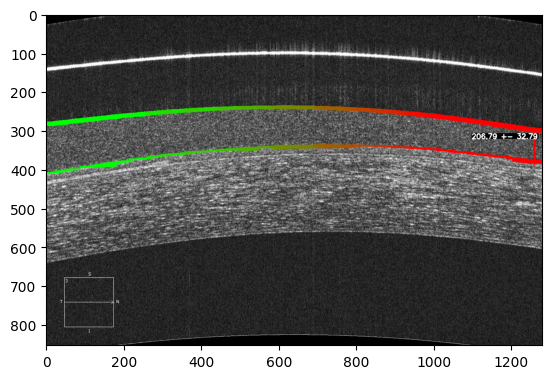

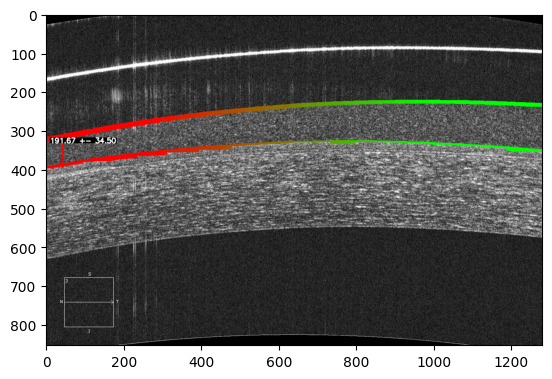

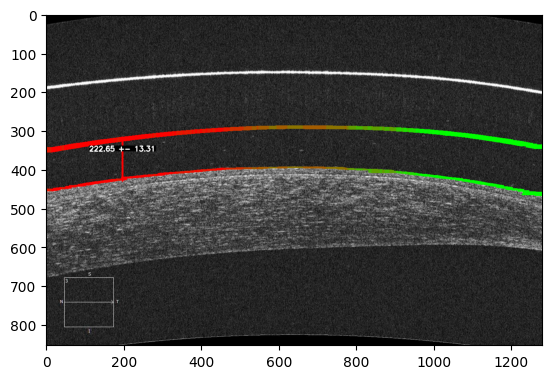

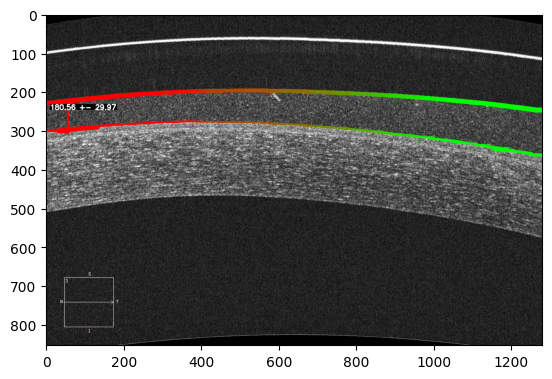

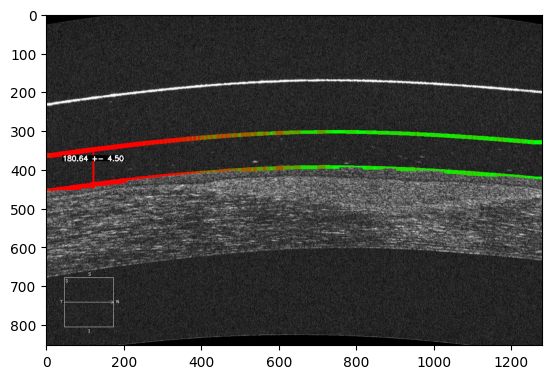

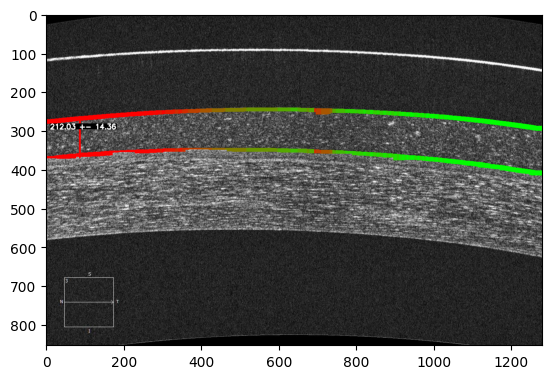

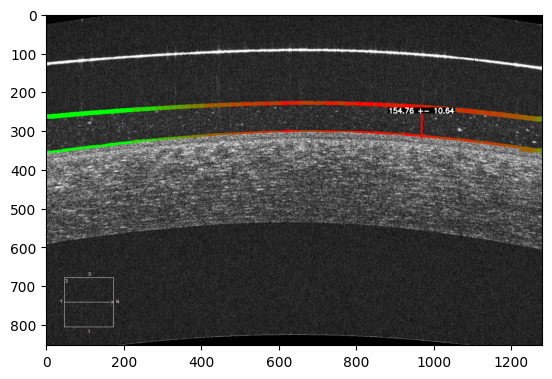

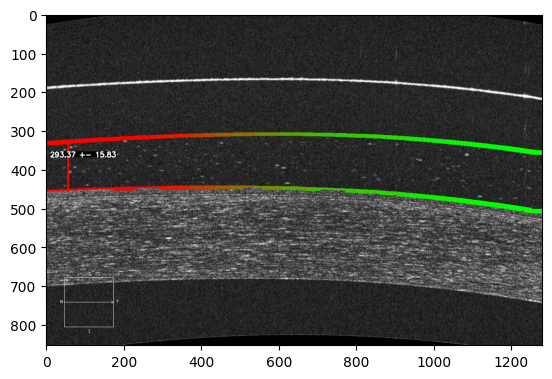

In [55]:


for i in range(len(estruc)):
    distances = Distancias_lentesxIm[i][1]
    zero = np.zeros_like(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
    _, ancho = zero.shape
    cv2.drawContours(zero, contours_filter[i][:2], -1, (255, 255, 255), thickness=cv2.FILLED)
    color = cv2.cvtColor(zero, cv2.COLOR_GRAY2BGR)
    # Normalizamos las distancias
    normalized_distances = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))
    media = np.mean(normalized_distances)
    desviacion = np.std(normalized_distances)
    rango_superior = media + desviacion
    rango_inferior = media - desviacion
    # Iterar sobre las columnas de la imagen y las distancias normalizadas simultáneamente
    for columna, distancia_normalizada in zip(range(ancho), normalized_distances):
        columna_img = estruc[i][:, columna]
        primer_pixel_blanco = next((i for i, pixel in enumerate(columna_img) if pixel == 255), None)

        if primer_pixel_blanco is not None:
            posiciones_blancas = [i for i, pixel in enumerate(columna_img[primer_pixel_blanco:], start=primer_pixel_blanco) if pixel == 255]
            if distancia_normalizada == np.min(normalized_distances):
                pt2 = (columna, posiciones_blancas[-20])
                pt3 = (columna, posiciones_blancas[-1])

            # Calcular el valor de interpolación entre rojo y verde
        if distancia_normalizada < rango_inferior:
            interpolacion = 0
        elif distancia_normalizada > rango_superior:
            interpolacion = 1
        else:
            # Si está dentro del rango, calcular la interpolación basada en la distancia al extremo
            distancia_al_rango_inferior = abs(distancia_normalizada - rango_inferior)
            distancia_al_rango_superior = abs(distancia_normalizada - rango_superior)
            distancia_total_rango = rango_superior - rango_inferior
            interpolacion = distancia_al_rango_inferior / distancia_total_rango

        rojo = int(255 * interpolacion)
        verde = int(255 * (1 - interpolacion))
        
        # Encontrar los índices de los píxeles blancos en la columna
        indices_blancos = np.where(color[:, columna] == 255)[0]
        
        
        # Cambiar el color de los píxeles blancos a rojo o verde
        for indice in indices_blancos:
            color[indice, columna] = [verde, rojo, 0]  # Rojo a Verde

    # Aplicar umbral para crear la máscara binaria
    _, mascara = cv2.threshold(zero, 10, 255, cv2.THRESH_BINARY)
    # Invertir la máscara
    mascara_invertida = cv2.bitwise_not(mascara)
    

    # Aplicar la máscara a la imagen base y al fondo
    imagen_superpuesta = cv2.bitwise_and(color, color, mask=mascara)
    fondo_superpuesto = cv2.bitwise_and(images[i], images[i], mask=mascara_invertida)
    imagen_final = cv2.add(imagen_superpuesta, fondo_superpuesto)
        
    # Dibujar la línea
    cv2.line(imagen_final, pt2, pt3, (255, 0, 0), 4)

    # Obtener el punto medio de la línea
    mid_point = ((pt2[0] + pt3[0]) // 2, (pt2[1] + pt3[1]) // 2)

    # Definir el texto y sus propiedades
    text = f'{np.mean(distances):.2f} +- {np.std(distances):.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    thickness = 2

    # Obtener el tamaño del texto
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)

    # Calcular las coordenadas del punto de origen del texto
    text_x = mid_point[0] - text_size[0] // 2
    text_y = mid_point[1] - text_size[1] - 10

    # Obtener las dimensiones de la imagen
    height, width = imagen_final.shape[:2]

    text_margin = 10  # Margen mínimo entre el texto y los bordes de la imagen
    text_x = max(min(text_x, width - text_margin - text_size[0]), text_margin)
    text_y = max(min(text_y, height - text_margin), text_margin + text_size[1])

    # Calcular las coordenadas del rectángulo de fondo
    background_x = text_x
    background_y = text_y - text_size[1]
    background_width = text_size[0]
    background_height = text_size[1]

    # Dibujar el rectángulo de fondo (negro)
    cv2.rectangle(imagen_final, (background_x, background_y), (background_x + background_width, background_y + background_height), (0, 0, 0), -1)



    # Dibujar el texto (blanco)
    cv2.putText(imagen_final, text, (text_x, text_y), font, font_scale, (255, 255, 255), thickness)

    plt.imshow(imagen_final, cmap = "gray")
    plt.show() 


